# Using Predictive Analytics to Predict Delays in Maritime Container Shipping

In [1]:
%matplotlib inline

** Import Libraries **

In [2]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#https://github.com/pandas-dev/pandas/issues/8509
warnings.filterwarnings('ignore', 'numpy not_equal will not check object identity in the future')

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import validation_curve

In [3]:
#Open the dataframe
df = pd.read_pickle('D:/CUNY Files/capstone/code files/2014_features.pkl')

** Build Linear Regression Model **

In [4]:
df.head()

,delay_days,consignee_name_nunique,shipper_party_name_nunique,shipper_consigner_nunique,container_number_nunique,piece_count_sum,shipment_count,no_ship_consign,top5_carrier,record_status_indicator_Amended,...,month_est_10,month_est_11,month_est_12,day_of_week_est_0,day_of_week_est_1,day_of_week_est_2,day_of_week_est_3,day_of_week_est_4,day_of_week_est_5,day_of_week_est_6
0,1,0,0,0,1,126,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,4,1,1,1,1,1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,4,0,0,0,1,2079,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,1,1,14,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,7,1,1,1,14,196,14,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
list(df)

['delay_days',
 'consignee_name_nunique',
 'shipper_party_name_nunique',
 'shipper_consigner_nunique',
 'container_number_nunique',
 'piece_count_sum',
 'shipment_count',
 'no_ship_consign',
 'top5_carrier',
 'record_status_indicator_Amended',
 'record_status_indicator_New',
 'month_est_1',
 'month_est_2',
 'month_est_3',
 'month_est_4',
 'month_est_5',
 'month_est_6',
 'month_est_7',
 'month_est_8',
 'month_est_9',
 'month_est_10',
 'month_est_11',
 'month_est_12',
 'day_of_week_est_0',
 'day_of_week_est_1',
 'day_of_week_est_2',
 'day_of_week_est_3',
 'day_of_week_est_4',
 'day_of_week_est_5',
 'day_of_week_est_6']

In [6]:
df.dtypes

delay_days                          int64
consignee_name_nunique              int64
shipper_party_name_nunique          int64
shipper_consigner_nunique           int64
container_number_nunique            int64
piece_count_sum                    uint64
shipment_count                      int64
no_ship_consign                     int32
top5_carrier                        int32
record_status_indicator_Amended     uint8
record_status_indicator_New         uint8
month_est_1                         uint8
month_est_2                         uint8
month_est_3                         uint8
month_est_4                         uint8
month_est_5                         uint8
month_est_6                         uint8
month_est_7                         uint8
month_est_8                         uint8
month_est_9                         uint8
month_est_10                        uint8
month_est_11                        uint8
month_est_12                        uint8
day_of_week_est_0                 

** Identify features (X) and target (y) **

In [7]:
#Identify the feature names
features = list(df.iloc[:,1:])

In [8]:
#set X and y
X = df.loc[:,features]
y = df.loc[:,['delay_days']]

In [9]:
#save X,y to a file
X.to_pickle('D:/CUNY Files/capstone/code files/X.pkl')
y.to_pickle('D:/CUNY Files/capstone/code files/y.pkl')

In [10]:
X.head()

,consignee_name_nunique,shipper_party_name_nunique,shipper_consigner_nunique,container_number_nunique,piece_count_sum,shipment_count,no_ship_consign,top5_carrier,record_status_indicator_Amended,record_status_indicator_New,...,month_est_10,month_est_11,month_est_12,day_of_week_est_0,day_of_week_est_1,day_of_week_est_2,day_of_week_est_3,day_of_week_est_4,day_of_week_est_5,day_of_week_est_6
0,0,0,0,1,126,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,1000,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,2079,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,1,14,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,14,196,14,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
y.head()

,delay_days
0,1
1,4
2,4
3,0
4,7


** Split into train, validation, and test sets ** 

In [12]:
#set the random seed
rand = 20

In [13]:
#split data into training and test sets
training_X, test_X, \
training_y, test_y = train_test_split(X, y, test_size=0.2,random_state = rand)

In [14]:
#further split the training set into train and validation sets
train_X, validation_X, \
train_y, validation_y = train_test_split(training_X, training_y, test_size=0.2, random_state = rand)

In [15]:
len(training_X), len(train_X), len(validation_X), len(test_X)

(297649, 238119, 59530, 74413)

In [16]:
len(training_y), len(train_y), len(validation_y), len(test_y)

(297649, 238119, 59530, 74413)

In [17]:
#save all sets to a file to use the same sets in other models
train_X.to_pickle('D:/CUNY Files/capstone/code files/train_X.pkl')
train_y.to_pickle('D:/CUNY Files/capstone/code files/train_y.pkl')

validation_X.to_pickle('D:/CUNY Files/capstone/code files/validation_X.pkl')
validation_y.to_pickle('D:/CUNY Files/capstone/code files/validation_y.pkl')

training_X.to_pickle('D:/CUNY Files/capstone/code files/training_X.pkl')
training_y.to_pickle('D:/CUNY Files/capstone/code files/training_y.pkl')

test_X.to_pickle('D:/CUNY Files/capstone/code files/test_X.pkl')
test_y.to_pickle('D:/CUNY Files/capstone/code files/test_y.pkl')

** Scale all features **  
transform the features to be closer to standard normally distributed data: Gaussian with zero mean and unit variance.

In [18]:
#use the training set to create a standard scaler for validation and test sets
#this scaler finds the mean and standard deviation of the train set
scaler = StandardScaler().fit(train_X)

In [19]:
#transform the features for all sets using the scaler created from the train set
#this will subtract the mean to center the data and divide by the standard deviation
#to scale it
training_X_scaled = scaler.transform(training_X)
train_X_scaled = scaler.transform(train_X)
validation_X_scaled = scaler.transform(validation_X)
test_X_scaled = scaler.transform(test_X)
len(training_X_scaled),len(train_X_scaled),len(validation_X_scaled),len(test_X_scaled)

(297649, 238119, 59530, 74413)

In [20]:
#save all sets to a file to use the same sets in other models
np.save('D:/CUNY Files/capstone/code files/train_X_scaled.npy', train_X_scaled)
#np.load('train_X_scaled.npy')  to reload

np.save('D:/CUNY Files/capstone/code files/validation_X_scaled.npy', validation_X_scaled)

np.save('D:/CUNY Files/capstone/code files/training_X_scaled.npy',training_X_scaled)

np.save('D:/CUNY Files/capstone/code files/test_X_scaled.pkl',test_X_scaled)

** Initial implementation: Linear Regression with Scaled Features, No Regularization **

In [21]:
#create a linear regression
regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [22]:
#fit the regression model
regr.fit(train_X_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Evaluate the performance of the model on the validation set **

In [23]:
#predict the target values of the validation set using the model
validation_y_pred = regr.predict(validation_X_scaled)

In [24]:
len(validation_y_pred)

59530

In [25]:
#Evaluate the MSE on the validation set
round(mean_squared_error(validation_y, validation_y_pred),2)

12.35

In [26]:
validation_y.describe()

,delay_days
count,59530.000000
mean,1.050462
std,3.778605
min,-30.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,30.000000


The delay_days range from -30 to 30 with most being within 2 or 3 days so the MSE is slightly lower than the variance of the target

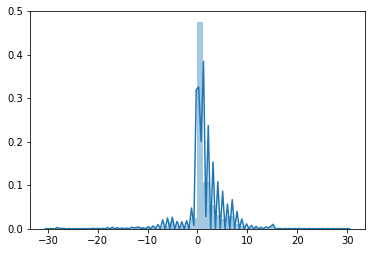

In [27]:
sns.distplot(validation_y)

In [28]:
#get intercept and coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [ 1.03878388]
Coefficients: 
 [[  1.91326137e-02  -1.98270651e-01   1.17321441e-01   1.25175404e-02
    2.60559794e-02   2.20090900e-02  -7.02859726e-02   4.57369902e-01
   -8.68113469e+10  -8.68113469e+10  -5.57492898e+11  -4.59113768e+11
   -4.74354159e+11  -5.60365423e+11  -5.61815610e+11  -5.67340706e+11
   -5.51553974e+11  -5.81530396e+11  -4.65708855e+11  -5.45948182e+11
   -5.41869416e+11  -4.59084247e+11  -8.53583934e+11  -7.29682659e+11
   -9.49745077e+11  -7.63097439e+11  -8.62596405e+11  -6.31164016e+11
   -9.15132151e+11]]


** Assess Bias vs Variance of the model **

In [73]:
#get the list of the training set sizes
s = 5
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=rand)
m = len(training_X)  #number of training examples
m_s = m/s*(s-1)
l = range(10,int(np.round(m_s,0)))
train_size = l[0::int(np.round(m_s/10,0))][1:]

In [74]:
#set up mean squared error as a scoring metric
mse_scorer = make_scorer(mean_squared_error)

In [75]:
def learn_curve(model,X,y,train_size):
    #Use full training set (train + validation and implement k-folds)
    #create a learning curve: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
    
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=train_size, cv = cv, scoring = mse_scorer)
    #get the mean of the training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    #plot the chart
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.ticklabel_format(useOffset=False,style='plain')

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")

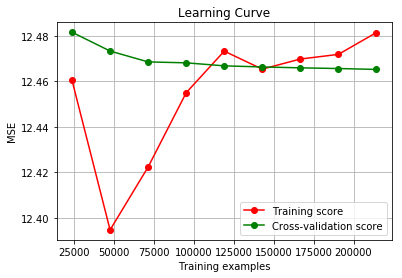

In [76]:
learn_curve(regr, training_X, training_y, train_size)

**High Bias**: error will be high for the training set and the validation set   
**High Variance**:  error will be low for the training set but much higher for the validation set  

Addressing high bias: additional features, adding polynomial features, decreasing the regularization parameter lambda  
Addressing high variance: additional training examples, smaller set of features, increase the regularization parameter lambda

** Add polynomial features **

In [77]:
#get polynomial function of order 2
poly = PolynomialFeatures(2)

#interaction terms only
#poly = PolynomialFeatures(degree=3, interaction_only=True)

In [78]:
#apply polynomial transform to get polynomial features
train_polyFit = poly.fit_transform(train_X_scaled) 
validation_polyFit = poly.fit_transform(validation_X_scaled) 
training_polyFit =  poly.fit_transform(training_X_scaled) 
test_polyFit = poly.fit_transform(test_X_scaled)

In [79]:
train_polyFit.shape, validation_polyFit.shape, training_polyFit.shape, test_polyFit.shape

((238119, 465), (59530, 465), (297649, 465), (74413, 465))

In [80]:
#View features
poly_features = poly.fit(training_X_scaled)
poly_features.get_feature_names(X.columns)

['1',
 'consignee_name_nunique',
 'shipper_party_name_nunique',
 'shipper_consigner_nunique',
 'container_number_nunique',
 'piece_count_sum',
 'shipment_count',
 'no_ship_consign',
 'top5_carrier',
 'record_status_indicator_Amended',
 'record_status_indicator_New',
 'month_est_1',
 'month_est_2',
 'month_est_3',
 'month_est_4',
 'month_est_5',
 'month_est_6',
 'month_est_7',
 'month_est_8',
 'month_est_9',
 'month_est_10',
 'month_est_11',
 'month_est_12',
 'day_of_week_est_0',
 'day_of_week_est_1',
 'day_of_week_est_2',
 'day_of_week_est_3',
 'day_of_week_est_4',
 'day_of_week_est_5',
 'day_of_week_est_6',
 'consignee_name_nunique^2',
 'consignee_name_nunique shipper_party_name_nunique',
 'consignee_name_nunique shipper_consigner_nunique',
 'consignee_name_nunique container_number_nunique',
 'consignee_name_nunique piece_count_sum',
 'consignee_name_nunique shipment_count',
 'consignee_name_nunique no_ship_consign',
 'consignee_name_nunique top5_carrier',
 'consignee_name_nunique rec

In [81]:
#save all sets to a file to use the same sets in other models
np.save('D:/CUNY Files/capstone/code files/train_polyFit.npy', train_polyFit)

In [82]:
np.save('D:/CUNY Files/capstone/code files/validation_polyFit.npy', validation_polyFit)

In [83]:
np.save('D:/CUNY Files/capstone/code files/training_polyFit.npy',training_polyFit)

In [84]:
np.save('D:/CUNY Files/capstone/code files/test_polyFit.npy',test_polyFit)

** Implement a Linear Regression with scaled polynomial features, without regularization **

In [85]:
#create a linear regression
regr_poly = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [86]:
#fit the regression model
regr_poly.fit(train_polyFit, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
#get intercept and coefficients
print('Intercept: \n', regr_poly.intercept_)
print('Coefficients: \n', regr_poly.coef_)

Intercept: 
 [  6.91157794e+10]
Coefficients: 
 [[ -8.44909204e+04  -2.12799205e+10  -4.25538500e+10  -1.44588081e+09
    5.06346767e-03   8.34933609e-02   7.09775699e-02   5.82679818e+10
   -3.81760068e+06   6.47002483e+08  -3.00952189e+08  -2.71818994e+09
   -4.57062977e+09   6.14514219e+09  -6.38669569e+09   1.31363621e+10
   -1.00240468e+09  -6.08785161e+08  -7.07718706e+08  -5.41674749e+08
   -4.78308695e+07  -4.14743735e+08   5.85160886e+08  -1.28762132e+09
   -2.66576227e+08   3.08662294e+08   2.54787057e+08   8.91126878e+08
   -7.06327444e+08  -8.75838076e+07  -3.54956038e+09   1.90679472e+09
    1.43846903e+10  -1.06046438e-01   3.44663858e-03   1.96689367e-01
    2.01263528e+10  -5.18497229e-02  -3.71385850e+08  -3.71385850e+08
    9.25808785e+07   7.62434036e+07   7.87743215e+07   9.30579088e+07
    9.32987360e+07   9.42162692e+07   9.15946224e+07   9.65727011e+07
    7.73386265e+07   9.06636883e+07   8.99863420e+07   7.62385010e+07
   -2.40207879e+08  -2.05340701e+08  -2.67

** Evaluate the model with polynomial features **

In [88]:
#predict the target values of the validation set using the model
validation_y_poly_pred = regr_poly.predict(validation_polyFit)

In [89]:
#Evaluate the MSE on the validation set
round(mean_squared_error(validation_y, validation_y_poly_pred),2)

2355515759643629.0

This error is extremely high, let's try regularization with ridge regression and then Lasso Regression

** Regularize with Ridge Regression (Linear least squares with l2 regularization) **

In [91]:
#set up the ridge model
ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=True, copy_X=True, max_iter=1000, tol=0.001, solver='auto', random_state=rand)

In [92]:
#fit the ridge model
ridge.fit(train_polyFit, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=20, solver='auto', tol=0.001)

** Evaluate the ridge model **

In [93]:
#predict the target values of the validation set using the model
validation_y_ridge_pred = ridge.predict(validation_polyFit)

In [94]:
#Evaluate the MSE on the validation set
round(mean_squared_error(validation_y, validation_y_ridge_pred),2)

11.609999999999999

** Regularize with Lasso Regression (Linear Model trained with L1 prior as regularizer) **

In [95]:
#set up the lasso model
lasso = Lasso(alpha=1.0, fit_intercept=True, normalize=True, precompute=False, copy_X=True, max_iter=2500, tol=0.0001, warm_start=False, positive=False, random_state=rand, selection='cyclic')

In [96]:
#fit the lasso model
lasso.fit(train_polyFit, train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=True, positive=False, precompute=False, random_state=20,
   selection='cyclic', tol=0.0001, warm_start=False)

** Evaluate the Lasso model **

In [97]:
#predict the target values of the validation set using the model
validation_y_lasso_pred = lasso.predict(validation_polyFit)

In [98]:
#Evaluate the MSE on the validation set
round(mean_squared_error(validation_y, validation_y_lasso_pred),2)

14.279999999999999

Regularizing the linear model with polynomial features with Ridge Regression resulted in a lower MSE than linear regression without poloynomial features. Regularizing with Lasso regression is not an improvement over the non-polynomial regression.

** Consider alternate values of alpha (regularization strength) for the Ridge regularization **

In [99]:
def valid_curve(model,X,y):
    #Use full training set (train + validation and implement k-folds)
    #create a learning curve: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
    train_scores, validation_scores = validation_curve(
        model, X, y, param_name = "alpha", 
        param_range = alpha_range, groups=None, cv=cv, 
        scoring= mse_scorer, n_jobs=1, pre_dispatch='all', verbose=0)
    #get the mean of the training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    #plot the chart
    plt.figure()
    plt.title('Validation Curve')
    plt.xlabel("Alpha - regularization strength")
    plt.ylabel("MSE")
    plt.ticklabel_format(useOffset=False,style='plain')

    plt.grid()

    plt.plot(alpha_range, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(alpha_range, validation_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")

In [100]:
#set up the range for alpha values
alpha_range = np.arange(0.1, 1.6, 0.2)
alpha_range

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5])

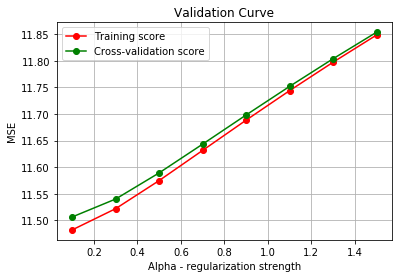

In [101]:
#plot the validation curve with a range of alpha values
valid_curve(ridge, training_polyFit, training_y)

The training and validation set MSE are pretty close for all values of alpha, reducing alpha to 0.1 would reduce the MSE slightly, but there aren't large differences between alpha = 0.1 and alpha = 1.0